In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [4]:
X = df.drop("Exited", axis=1)   # Features
y = df["Exited"]                # Target (Churn)


In [5]:
categorical_cols = ["Geography", "Gender"]
numerical_cols = [col for col in X.columns if col not in categorical_cols]

print("Categorical:", categorical_cols)
print("Numerical:", numerical_cols)


Categorical: ['Geography', 'Gender']
Numerical: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [6]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_cols),
        ("num", "passthrough", numerical_cols)
    ]
)


In [7]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Geography', 'Gender']),
                                                 ('num', 'passthrough',
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [10]:
y_pred = model.predict(X_test)


In [11]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.8695

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.77      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



In [12]:
# Get encoded feature names
ohe = model.named_steps["preprocessor"].named_transformers_["cat"]
encoded_cat_features = ohe.get_feature_names_out(categorical_cols)

all_features = list(encoded_cat_features) + numerical_cols

# Get importance scores
importances = model.named_steps["classifier"].feature_importances_

feat_imp = pd.Series(importances, index=all_features).sort_values(ascending=False)
print(feat_imp.head(10))


Age                  0.236485
EstimatedSalary      0.147893
CreditScore          0.141969
Balance              0.139974
NumOfProducts        0.134944
Tenure               0.081018
IsActiveMember       0.039773
Geography_Germany    0.025269
Gender_Male          0.020371
HasCrCard            0.018583
dtype: float64


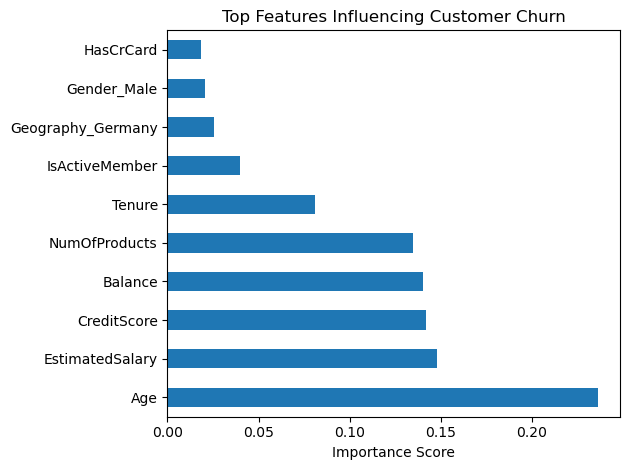

In [13]:
top_features = feat_imp.head(10)

plt.figure()
top_features.plot(kind="barh")
plt.title("Top Features Influencing Customer Churn")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()
